In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
df1 = pd.read_csv("/Users/sheetals/Downloads/zomato-reviews-classification/data/zomato_reviews.csv")
print(df1.shape)
df1.sample(10)

(20000, 5)


,review_id,rating,review_text,review_date,helpful
4351,257bef9c-cb88-4f49-a7ac-d78976f2d669,3,every food we order is at higher price compare...,2025-11-12 08:55:32,0
19327,e37307c7-7096-4e34-8905-eb5bc5dffb07,5,this is a very fast app that makes and deliver...,2025-10-01 20:23:17,0
3768,40f73a27-4a42-4476-96ff-3e2a1bd17d12,5,fast delivery and good service,2025-11-14 11:07:52,0
15682,7ffdcd1a-f98b-4f5c-bdb2-08f0adf0eed9,5,Nice experience with zomato I'm in belt force ...,2025-10-10 12:22:17,0
15979,f8b6ee0c-f4d1-4e45-8550-d62375959673,5,satisfaction fully in all manner,2025-10-09 15:59:15,0
15538,a6fdeba0-2d3f-4dee-b989-be65b7579f27,4,It is very difficult to give 5 star rating to ...,2025-10-10 19:10:38,0
14179,b28ae67e-22c9-4feb-83e4-11833e8e1ce0,5,With other restaurants the experience was grea...,2025-10-13 21:50:13,0
6740,8a5a3ef5-bfd6-41fc-b708-0c1f08abadbd,1,the signing part is the worst like they give y...,2025-11-04 15:01:21,0
13532,f47de495-7a01-4935-832e-da2a00cbccc5,5,very good service so thanks of zomato,2025-10-15 21:13:13,0
4553,810def31-b545-4d1a-b167-0b0c50d3ee28,5,Good food and Good delivery team,2025-11-11 15:22:50,0


In [10]:
df = df1[['review_text', 'helpful']]

In [11]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [12]:
df['preprocessed_text'] = df['review_text'].apply(preprocess)
df.head()

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_11485/213949944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['review_text'].apply(preprocess)


,review_text,helpful,preprocessed_text
0,kindly requesting to return change . we are fo...,0,kindly request return change force let r 100 p...
1,"Hiked prices, packing and platform charges",0,hike price packing platform charge
2,good discount,0,good discount
3,"Zomato in its initial days was too good, but c...",0,zomato initial day good currently platform sta...
4,good application,0,good application


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df['preprocessed_text'],
    df['helpful'],
    test_size=0.2,
    random_state=42,
)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

clf = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB()),
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3791
           1       0.07      0.01      0.02       112
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          39       0.00    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [16]:
df.helpful.value_counts()

helpful
0      18962
1        584
2        140
3         51
4         46
       ...  
128        1
123        1
125        1
45         1
26         1
Name: count, Length: 103, dtype: int64

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sheetals/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sheetals/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sheetals/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sheetals/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
STOPWORDS = set(stopwords.words('english'))
lemmetizer = WordNetLemmatizer()

In [20]:
df = pd.read_csv("/Users/sheetals/Downloads/zomato-reviews-classification/data/zomato_reviews.csv")
df.shape

(20000, 5)

In [21]:
df.head()

,review_id,rating,review_text,review_date,helpful
0,90749778-cd88-4c19-8b12-1fce7e7d82f8,4,kindly requesting to return change . we are fo...,2025-11-27 08:15:26,0
1,aa848bb6-d242-4a7e-831e-4f21e2e60c6e,1,"Hiked prices, packing and platform charges",2025-11-27 08:08:31,0
2,4f888388-9f28-44a4-8601-491a87035e53,5,good discount,2025-11-27 04:20:28,0
3,490a16b3-aacf-4204-bdcb-ffdbf04add72,1,"Zomato in its initial days was too good, but c...",2025-11-27 03:34:38,0
4,0090a503-13b8-4741-a7c0-42e811244563,5,good application,2025-11-27 02:50:58,0


In [22]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').astype('Int64')

In [23]:
import re

url_pattern = re.compile(r'https?://\S+|www\.\S+')
emoji_pattern = re.compile("""[\U0001F600-\U0001F64F""" +
"\U0001F300-\U0001F5FF" +
"\U0001F680-\U0001F6FF" +
"\U0001F1E0-\U0001F1FF" +
"]+", flags=re.UNICODE)

In [24]:
def clean_text(text):
    if not isinstance(text, str):
        return " "
    text = url_pattern.sub('',text)
    text = emoji_pattern.sub('',text)
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", ' ', text) # remove punctuation (keep alnum)
    text = re.sub(r'\s+', ' ', text) # normalize whitespace
    return text.strip()

In [25]:
df['clean_text'] = df['review_text'].apply(clean_text)

In [26]:
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 1]
    tokens = [lemmetizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

USE_PREPROCESS = True
if USE_PREPROCESS:
    df['proc_text'] = df['clean_text'].apply(preprocess)
else:
    df['proc_text'] = df['clean_text']

In [27]:
print('\nRatings distribution:')
print(df['rating'].value_counts().sort_index())


Ratings distribution:
rating
1     5068
2      406
3      666
4     2770
5    11090
Name: count, dtype: Int64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

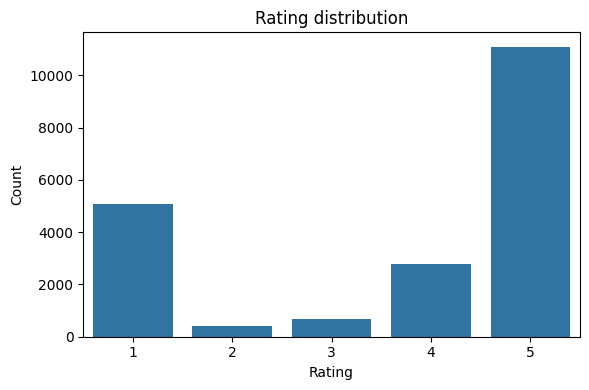

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, order=sorted(df['rating'].dropna().unique()))
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [33]:

# Review length analysis
df['review_length'] = df['clean_text'].apply(lambda x: len(x.split()))
print('\nReview length stats (words):')
print(df['review_length'].describe())


Review length stats (words):
count    20000.000000
mean        14.823550
std         19.150631
min          1.000000
25%          4.000000
50%          7.000000
75%         17.000000
max        142.000000
Name: review_length, dtype: float64


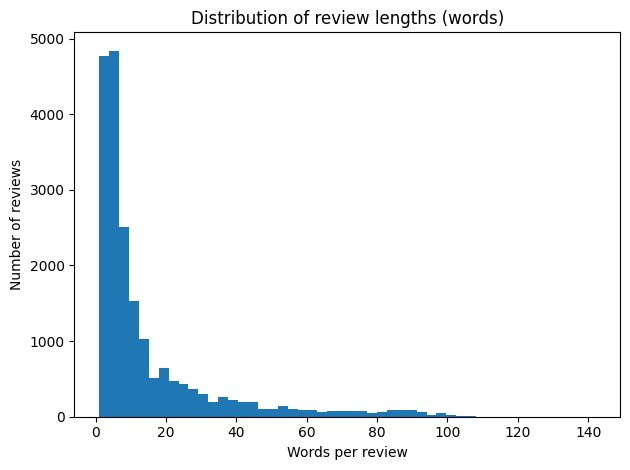

In [34]:
# plt.figure(figsize=(8,4))
plt.hist(df['review_length'], bins=50)
plt.title('Distribution of review lengths (words)')
plt.xlabel('Words per review')
plt.ylabel('Number of reviews')
plt.tight_layout()
plt.show()

In [35]:
def rating_to_label(r):
    if pd.isna(r):
        return None
    if int(r) <= 2:
        return 'negative'
    if int(r) == 3:
        return 'neutral'
    return 'positive'

In [36]:
df['label_from_rating'] = df['rating'].apply(rating_to_label)
print('\nLabel counts from rating:')
print(df['label_from_rating'].value_counts())


Label counts from rating:
label_from_rating
positive    13860
negative     5474
neutral       666
Name: count, dtype: int64


In [37]:
df = df[df['label_from_rating'].notnull()].copy()

In [38]:
BINARY = False
if BINARY:
    df['target'] = df['label_from_rating'].apply(lambda x: 1 if x == 'positive' else 0)
else:
    df['target'] = df['label_from_rating']

In [39]:
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['proc_text'])
print('TF-IDF shape:', X.shape)

TF-IDF shape: (20000, 20000)


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y  = le.fit_transform(df['target'])
print('Target classes:', le.classes_)


Target classes: ['negative' 'neutral' 'positive']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train/Test sizes:', X_train.shape, X_test.shape)

Train/Test sizes: (16000, 20000) (4000, 20000)


In [49]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

def evaluate(model, X_test, y_test, labels):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Accuracy:', acc)
    print('F1 score:', f1)
    print("Classification report: ")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = list(le.classes_)

Logistic Regression training...
Logistic Regression Evaluation....
Accuracy: 0.8625
F1 score: 0.8741894254058755
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1095
           1       0.13      0.26      0.18       133
           2       0.95      0.89      0.92      2772

    accuracy                           0.86      4000
   macro avg       0.64      0.67      0.65      4000
weighted avg       0.89      0.86      0.87      4000



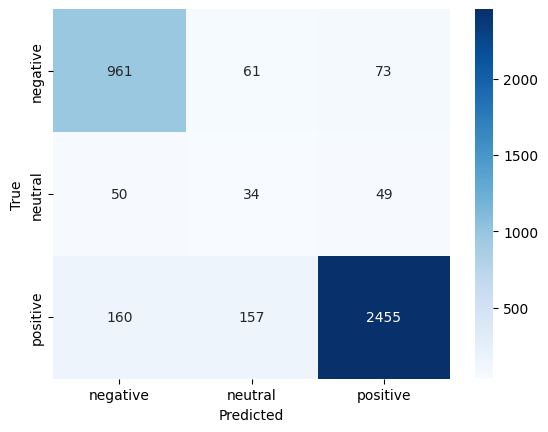

In [53]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression training...")
clf_lr = LogisticRegression(max_iter=1000, class_weight="balanced")
clf_lr.fit(X_train, y_train)
print("Logistic Regression Evaluation....")
evaluate(clf_lr, X_test, y_test, labels)


Training MultinomialNB...
MultinomialNB evaluation:
Accuracy: 0.90175
F1 score: 0.8858174407926945
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1095
           1       0.00      0.00      0.00       133
           2       0.91      0.97      0.94      2772

    accuracy                           0.90      4000
   macro avg       0.60      0.60      0.60      4000
weighted avg       0.87      0.90      0.89      4000



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

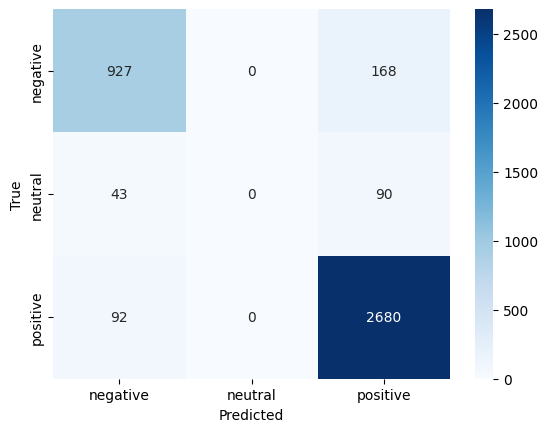

In [52]:
print('\nTraining MultinomialNB...')
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
print('MultinomialNB evaluation:')
evaluate(clf_nb, X_test, y_test, labels)